In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
path = 'drive/MyDrive/Research/data_collection/final_cleaned/final_dataset.csv'
df = pd.read_csv(path)
df.head()

,fcp,interactive,srt,dom_size,but,fmp,tbt,tbw,fci,cls,lcp,ux_index,fid_category,lcp_category,fcp_category,cls_category
0,810.0,1623.000353,148.574,222,95.844,810.0,1.0,964194,1582.0,0.000000,890.0,810.000000,1,1,2,1
1,791.0,1938.500000,34.172,1049,574.117,1028.5,134.0,2463660,1604.0,0.000000,1623.0,1313.142001,1,1,2,1
2,660.0,1141.000000,309.005,1814,217.650,813.0,68.0,571401,1006.0,0.000800,1440.0,999.346206,1,1,2,1
3,655.0,3584.500000,348.280,1413,1686.482,726.0,484.0,1628682,3204.0,0.028540,820.0,1023.158693,1,2,2,1
4,770.0,3351.000000,775.957,1156,1554.168,770.0,537.0,1737243,3071.0,0.033484,2881.0,1869.895174,1,2,2,2


In [ ]:
df.describe()

,fcp,interactive,srt,dom_size,but,fmp,tbt,tbw,fci,cls,lcp,ux_index,fid_category,lcp_category,fcp_category,cls_category
count,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,7.784800e+04,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000
mean,949.896877,4166.749076,953.214688,1322.833920,1906.515876,1128.364308,376.275662,3.202074e+06,3384.799288,0.173483,2554.590280,3008.959377,1.004457,1.747611,2.041658,2.047503
std,569.055952,3436.686751,867.599139,1735.764199,2345.304451,712.299573,679.024364,5.151235e+06,2604.912209,0.274208,2095.029173,1813.243063,0.074791,0.738680,0.440682,0.862526
min,193.000000,193.000000,5.790000,0.000000,0.000000,193.000000,0.000000,2.530000e+02,193.000000,0.000000,194.000000,195.000000,1.000000,1.000000,1.000000,1.000000
25%,620.000000,1577.000000,359.255500,536.000000,289.348500,709.000000,17.000000,1.103931e+06,1370.000000,0.005676,1213.000000,1655.201361,1.000000,1.000000,2.000000,1.000000
50%,829.000000,3278.000000,761.573500,917.000000,1049.827500,943.500000,150.000000,2.168678e+06,2711.500000,0.063810,2055.000000,2657.775900,1.000000,2.000000,2.000000,2.000000
75%,1120.000000,5726.625000,1280.512250,1555.000000,2529.454750,1370.000000,476.000000,3.902902e+06,4681.000000,0.213731,3224.000000,3933.308755,1.000000,2.000000,2.000000,3.000000
max,16685.000000,71034.500000,9882.753000,73824.000000,24618.874000,32425.000000,28278.000000,3.476087e+08,33366.000000,4.312501,112390.000000,32516.842370,3.000000,3.000000,3.000000,3.000000


In [ ]:
df_reg = df.drop(
  columns = ['fid_category', 'lcp_category', 'fcp_category', 'cls_category'],
  axis = 1
)
df_reg.head()

,fcp,interactive,srt,dom_size,but,fmp,tbt,tbw,fci,cls,lcp,ux_index
0,810.0,1623.000353,148.574,222,95.844,810.0,1.0,964194,1582.0,0.000000,890.0,810.000000
1,791.0,1938.500000,34.172,1049,574.117,1028.5,134.0,2463660,1604.0,0.000000,1623.0,1313.142001
2,660.0,1141.000000,309.005,1814,217.650,813.0,68.0,571401,1006.0,0.000800,1440.0,999.346206
3,655.0,3584.500000,348.280,1413,1686.482,726.0,484.0,1628682,3204.0,0.028540,820.0,1023.158693
4,770.0,3351.000000,775.957,1156,1554.168,770.0,537.0,1737243,3071.0,0.033484,2881.0,1869.895174


In [ ]:
df_reg.describe()

,fcp,interactive,srt,dom_size,but,fmp,tbt,tbw,fci,cls,lcp,ux_index
count,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,7.784800e+04,77848.000000,77848.000000,77848.000000,77848.000000
mean,949.896877,4166.749076,953.214688,1322.833920,1906.515876,1128.364308,376.275662,3.202074e+06,3384.799288,0.173483,2554.590280,3008.959377
std,569.055952,3436.686751,867.599139,1735.764199,2345.304451,712.299573,679.024364,5.151235e+06,2604.912209,0.274208,2095.029173,1813.243063
min,193.000000,193.000000,5.790000,0.000000,0.000000,193.000000,0.000000,2.530000e+02,193.000000,0.000000,194.000000,195.000000
25%,620.000000,1577.000000,359.255500,536.000000,289.348500,709.000000,17.000000,1.103931e+06,1370.000000,0.005676,1213.000000,1655.201361
50%,829.000000,3278.000000,761.573500,917.000000,1049.827500,943.500000,150.000000,2.168678e+06,2711.500000,0.063810,2055.000000,2657.775900
75%,1120.000000,5726.625000,1280.512250,1555.000000,2529.454750,1370.000000,476.000000,3.902902e+06,4681.000000,0.213731,3224.000000,3933.308755
max,16685.000000,71034.500000,9882.753000,73824.000000,24618.874000,32425.000000,28278.000000,3.476087e+08,33366.000000,4.312501,112390.000000,32516.842370


# Correlation Heatmap: Regression

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

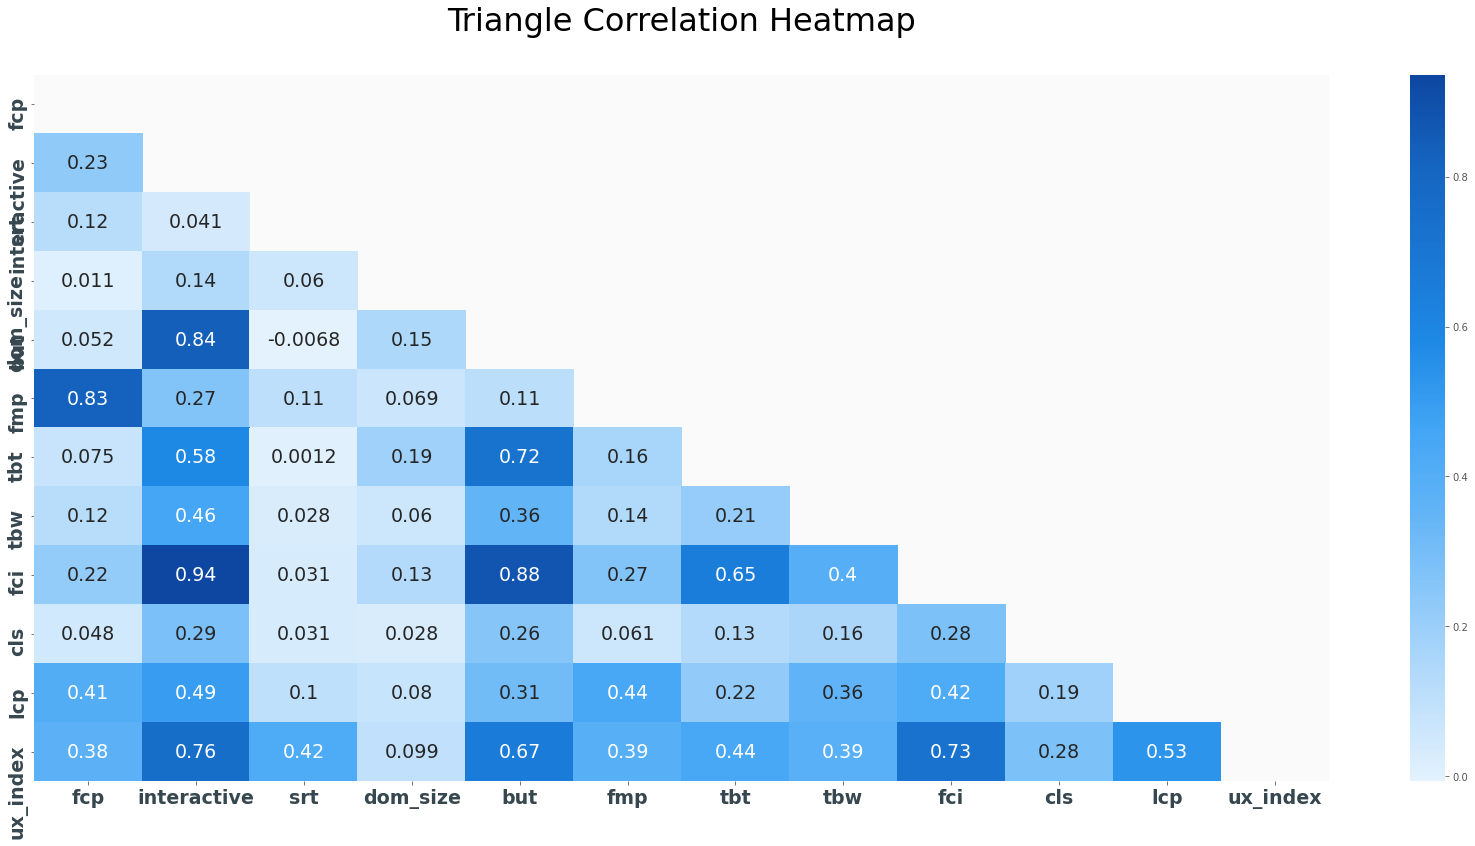

In [ ]:
correlation_matrix = df_reg.corr()
plt.figure(figsize=(29, 13))
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))
title = 'Triangle Correlation Heatmap'

matrix = np.array([[149030, 34], [7442, 12]])
boundaries = [value for value in matrix.flatten().tolist()]
colors = ["#e3f2fd", "#bbdefb", "#90caf9","#64b5f6", '#42a5f5', '#1e88e5', '#1976d2', '#1565c0', '#0d47a1']
norm = matplotlib.colors.BoundaryNorm(boundaries=boundaries + [boundaries[-1]], ncolors=256)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap=cmap,
    annot_kws={"size": 19}
)
sns.set(font_scale=1.8)
heatmap.set_facecolor('#fafafa')
heatmap.set_xticklabels(
    labels=df_reg.columns,
    fontdict={
        'color': '#37474f',
        'size': 19,
        'weight': 'bold'
    }
)
heatmap.set_yticklabels(
    labels=df_reg.columns,
    fontdict={
        'color': '#37474f',
        'size': 19,
        'weight': 'bold'
    }
)
heatmap.set_title(
  title,
  fontdict={
  'fontsize': 32
  }, 
  pad=44
)

### Outliers Detection

In [ ]:
sns.set(font_scale=1.0)

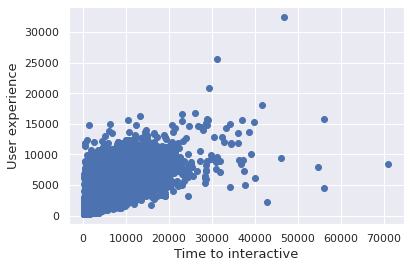

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['interactive'], y = df['ux_index'], cmap='Blues_r')

plt.ylabel('User experience', fontsize=13)
plt.xlabel('Time to interactive', fontsize=13)
plt.show()

In [ ]:
def get_scatter_plot(dataframe,
                     x_axis,
                     y_axis,
                     xlabel,
                     ylabel,
                     hue_category,
                     size_category,
                     legend_title,
                     legend_strength="full",
                     palette_style="Blues",
                     min_dot_size=50,
                     max_dot_size=80,
                     face_color='#fafafa',
                     width=12,
                     height=10):

    plt.figure(figsize=(width, height))

    figure = sns.scatterplot(data=dataframe,
                             x=x_axis,
                             y=y_axis,
                             hue=hue_category,
                             size=size_category,
                             sizes=(min_dot_size, max_dot_size),
                             legend=legend_strength,
                             palette=palette_style)

    figure.set_facecolor(color=face_color)
    figure.set_xlabel(xlabel, fontsize = 15, fontweight = "bold", labelpad = 30)
    figure.set_ylabel(ylabel, fontsize = 15, fontweight = "bold", labelpad = 30)
    plt.legend(title=legend_title)
    plt.show()

In [ ]:
df["cls_category"].replace({1: "FAST", 2: "MODERATE", 3: "SLOW"}, inplace=True)

In [ ]:
df["lcp_category"].replace({1: "FAST", 2: "MODERATE", 3: "SLOW"}, inplace=True)

In [ ]:
df.tail(3)

,fcp,interactive,srt,dom_size,but,fmp,tbt,tbw,fci,cls,lcp,ux_index,fid_category,lcp_category,fcp_category,cls_category
77845,962.14637,1002.14637,220.649,631,66.094,1002.14637,0.0,1309294,1002.14637,0.086350,1077.14637,1299.766138,1,MODERATE,2,MODERATE
77846,540.00000,7437.50000,698.054,817,2817.979,540.00000,383.5,3271286,6220.00000,0.258797,2247.50000,3935.173329,1,FAST,2,SLOW
77847,1245.00000,13355.50000,538.280,968,11471.883,1245.00000,1587.5,10350894,11362.00000,0.560954,2155.00000,6699.855141,1,MODERATE,2,SLOW


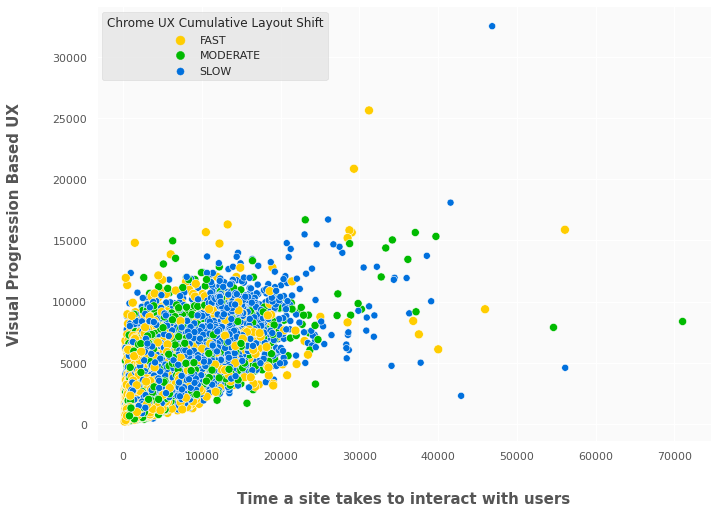

In [ ]:
plt.style.use('ggplot')

get_scatter_plot(
    dataframe = df,
    x_axis = "interactive",
    y_axis = "ux_index",
    xlabel = "Time a site takes to interact with users",
    ylabel = "Visual Progression Based UX",
    hue_category = "cls_category",
    size_category = "cls_category",
    width = 11,
    height = 8,
    palette_style = "nipy_spectral_r",
    legend_title = "Chrome UX Cumulative Layout Shift"
)

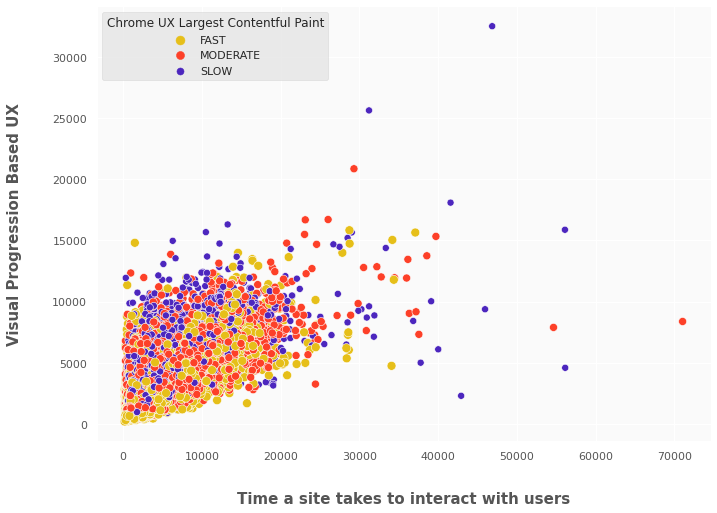

In [ ]:
plt.style.use('ggplot')

get_scatter_plot(
    dataframe = df,
    x_axis = "interactive",
    y_axis = "ux_index",
    xlabel = "Time a site takes to interact with users",
    ylabel = "Visual Progression Based UX",
    hue_category = "lcp_category",
    size_category = "lcp_category",
    width = 11,
    height = 8,
    palette_style = "CMRmap_r",
    legend_title = "Chrome UX Largest Contentful Paint"
)

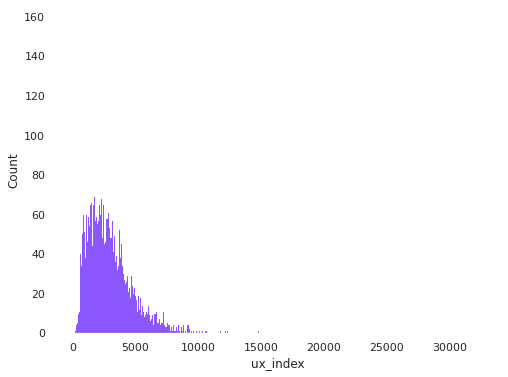

In [ ]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="ux_index", binwidth=3, color='#651fff')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


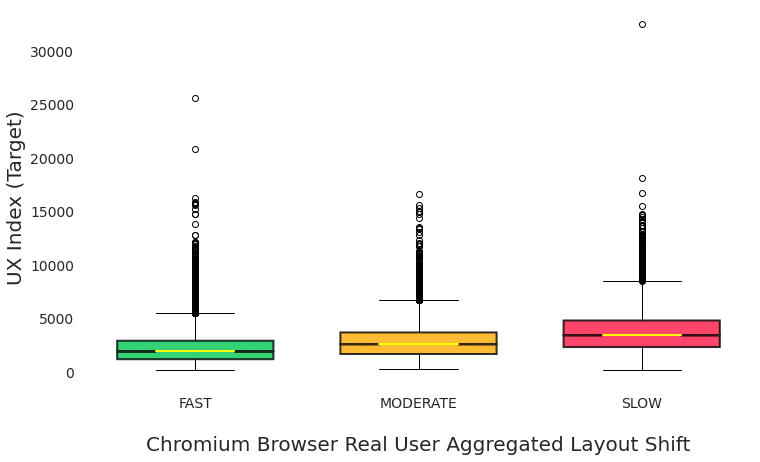

In [ ]:
fast_cls = df[df['cls_category']=='FAST']['ux_index']
moderate_cls = df[df['cls_category']=='MODERATE']['ux_index']
slow_cls = df[df['cls_category']=='SLOW']['ux_index']

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(111)
boxplots = ax.boxplot([fast_cls,moderate_cls,slow_cls],
           notch = True,
           labels=['FAST', 'MODERATE', 'SLOW'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .8)
          );

boxplot = boxplots['boxes']
boxplot[0].set_facecolor('#00c853')
boxplot[1].set_facecolor('#ffab00')
boxplot[2].set_facecolor('#ff1744')

plt.xlabel('Chromium Browser Real User Aggregated Layout Shift', fontsize = 20, labelpad=25);
plt.ylabel('UX Index (Target)', fontsize = 20);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


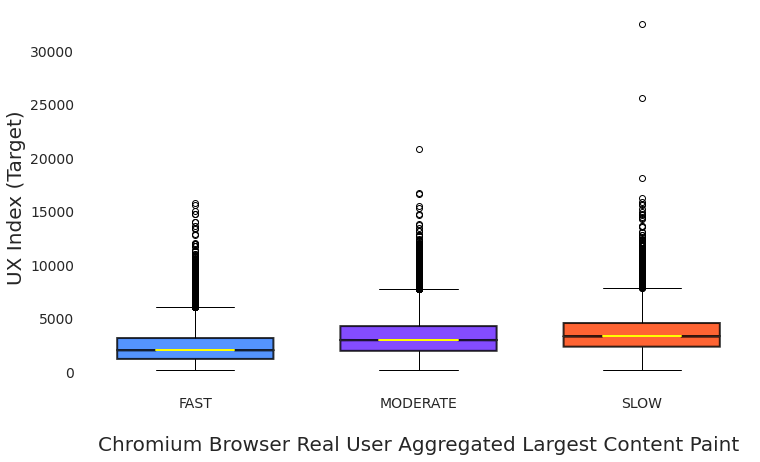

In [ ]:
fast_lcp = df[df['lcp_category']=='FAST']['ux_index']
moderate_lcp = df[df['lcp_category']=='MODERATE']['ux_index']
slow_lcp = df[df['lcp_category']=='SLOW']['ux_index']

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(111)
boxplots = ax.boxplot([fast_lcp,moderate_lcp,slow_lcp],
           notch = True,
           labels=['FAST', 'MODERATE', 'SLOW'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .8)
          );

boxplot = boxplots['boxes']
boxplot[0].set_facecolor('#2979ff')
boxplot[1].set_facecolor('#651fff')
boxplot[2].set_facecolor('#ff3d00')

plt.xlabel('Chromium Browser Real User Aggregated Largest Content Paint', fontsize = 20, labelpad=25);
plt.ylabel('UX Index (Target)', fontsize = 20);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.show()